# Riemann Problem

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from kuibit.simdir import SimDir
from kuibit.grid_data import UniformGrid

# Initial Resolution

dx = 0.0025 -Z N=400

## Exact Solution

In [13]:
#initial data from the Exact Riemann solver of https://www.brunogiacomazzo.org/?page_id=395
exact = np.loadtxt("Sod_exact.dat")

In [14]:
x_exact=exact[:,0]
rho_exact=exact[:,1]
press_exact=exact[:,2] #note: this is pgas+pmag
vx_exact=exact[:,3]
vy_exact=exact[:,4]
vz_exact=exact[:,5]
By_exact=exact[:,6]
Bz_exact=exact[:,7]

In [15]:
rho_exact

array([1.   , 1.   , 1.   , ..., 0.125, 0.125, 0.125])

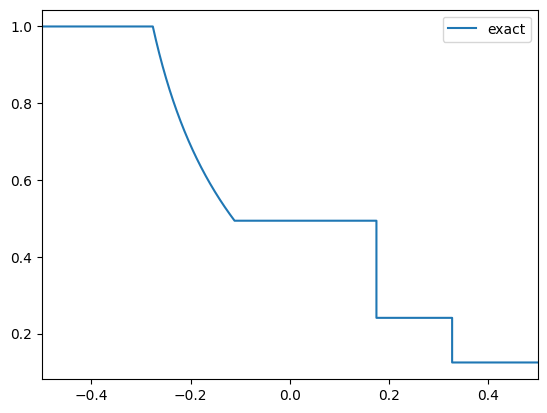

In [16]:
plt.plot(x_exact.tolist(), rho_exact.tolist(), label="exact")
plt.xlim(-0.5, 0.5)
plt.legend()
plt.show()

## Read the Numerical Results

In [34]:
gf= SimDir("./Sod_1d_400").gf #simulation directory - so the directory where the results are saved
print(gf) #gridfunction are all the functions available on the grid

#we dont have 2d or 3d output because we selected it in the par file


Available grid data of dimension 1D (x): 
['tau', 'vel[2]', 'vel[0]', 'eps', 'w_lorentz', 'press', 'scon[2]', 'scon[1]', 'rho', 'scon[0]', 'dens', 'vel[1]']


Available grid data of dimension 1D (y): 
['vel[2]', 'w_lorentz', 'scon[2]', 'rho', 'dens', 'scon[1]', 'vel[1]', 'tau', 'eps', 'vel[0]', 'scon[0]', 'press']


Available grid data of dimension 1D (z): 
['vel[0]', 'vel[1]', 'tau', 'vel[2]', 'press', 'rho', 'scon[1]', 'scon[2]', 'scon[0]', 'eps', 'w_lorentz', 'dens']


Available grid data of dimension 2D (xy): 
[]


Available grid data of dimension 2D (xz): 
[]


Available grid data of dimension 2D (yz): 
[]


Available grid data of dimension 3D (xyz): 
[]



In [18]:
vars1d=gf.x #only the ones saved on the x axis
print(vars1d)


Available grid data of dimension 1D (x): 
['tau', 'vel[2]', 'vel[0]', 'eps', 'w_lorentz', 'press', 'scon[2]', 'scon[1]', 'rho', 'scon[0]', 'dens', 'vel[1]']



In [19]:
rho=vars1d.fields.rho

## Kuibit Standard Methods for Plots

We create a uniform grid and plot the data on it. Kuibit indeed assumes that data were produced on a grid with several meshes (AMR). In our case the grid was already uniform, so later we will see an alternative way to plot the data without interpolating them on a new grid.

In [20]:
small_grid = UniformGrid([101], x0=[-0.45], x1=[0.45]) #101 points from -0.45 to 0.45

In [21]:
print(rho.iterations)

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]


In [22]:
rho_final = rho.read_on_grid(200, small_grid)

In [23]:
print(*rho_final.coordinates_meshgrid())

[-4.50000000e-01 -4.41000000e-01 -4.32000000e-01 -4.23000000e-01
 -4.14000000e-01 -4.05000000e-01 -3.96000000e-01 -3.87000000e-01
 -3.78000000e-01 -3.69000000e-01 -3.60000000e-01 -3.51000000e-01
 -3.42000000e-01 -3.33000000e-01 -3.24000000e-01 -3.15000000e-01
 -3.06000000e-01 -2.97000000e-01 -2.88000000e-01 -2.79000000e-01
 -2.70000000e-01 -2.61000000e-01 -2.52000000e-01 -2.43000000e-01
 -2.34000000e-01 -2.25000000e-01 -2.16000000e-01 -2.07000000e-01
 -1.98000000e-01 -1.89000000e-01 -1.80000000e-01 -1.71000000e-01
 -1.62000000e-01 -1.53000000e-01 -1.44000000e-01 -1.35000000e-01
 -1.26000000e-01 -1.17000000e-01 -1.08000000e-01 -9.90000000e-02
 -9.00000000e-02 -8.10000000e-02 -7.20000000e-02 -6.30000000e-02
 -5.40000000e-02 -4.50000000e-02 -3.60000000e-02 -2.70000000e-02
 -1.80000000e-02 -9.00000000e-03  5.55111512e-17  9.00000000e-03
  1.80000000e-02  2.70000000e-02  3.60000000e-02  4.50000000e-02
  5.40000000e-02  6.30000000e-02  7.20000000e-02  8.10000000e-02
  9.00000000e-02  9.90000

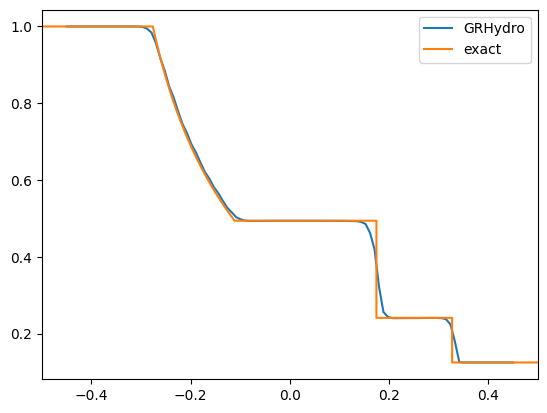

In [24]:
plt.plot(*rho_final.coordinates_meshgrid(), rho_final.data_xyz, label="GRHydro")
plt.plot(x_exact, rho_exact, label="exact")
plt.xlim(-0.5, 0.5)
#plt.ylim(0.1, 0.3)
plt.legend()
plt.show()

solution is quite good , even if shock and discontinuity is a lil bit smoothed out

## Alternative Method
This method can only be used with simulations that used only one refinement level (i.e., a uniform grid) and using only 1 MPI process. 

this essentially don't do an interpolation

In [29]:
#[iterazione][refinement level][component number] - we change just iteration, now is 0=initial condition
rho[0][0][0].data #raw data with no interpolation 

array([1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   ,

In [30]:
rho[0][0][0].coordinates()[0].data

array([-0.4975, -0.495 , -0.4925, -0.49  , -0.4875, -0.485 , -0.4825,
       -0.48  , -0.4775, -0.475 , -0.4725, -0.47  , -0.4675, -0.465 ,
       -0.4625, -0.46  , -0.4575, -0.455 , -0.4525, -0.45  , -0.4475,
       -0.445 , -0.4425, -0.44  , -0.4375, -0.435 , -0.4325, -0.43  ,
       -0.4275, -0.425 , -0.4225, -0.42  , -0.4175, -0.415 , -0.4125,
       -0.41  , -0.4075, -0.405 , -0.4025, -0.4   , -0.3975, -0.395 ,
       -0.3925, -0.39  , -0.3875, -0.385 , -0.3825, -0.38  , -0.3775,
       -0.375 , -0.3725, -0.37  , -0.3675, -0.365 , -0.3625, -0.36  ,
       -0.3575, -0.355 , -0.3525, -0.35  , -0.3475, -0.345 , -0.3425,
       -0.34  , -0.3375, -0.335 , -0.3325, -0.33  , -0.3275, -0.325 ,
       -0.3225, -0.32  , -0.3175, -0.315 , -0.3125, -0.31  , -0.3075,
       -0.305 , -0.3025, -0.3   , -0.2975, -0.295 , -0.2925, -0.29  ,
       -0.2875, -0.285 , -0.2825, -0.28  , -0.2775, -0.275 , -0.2725,
       -0.27  , -0.2675, -0.265 , -0.2625, -0.26  , -0.2575, -0.255 ,
       -0.2525, -0.2

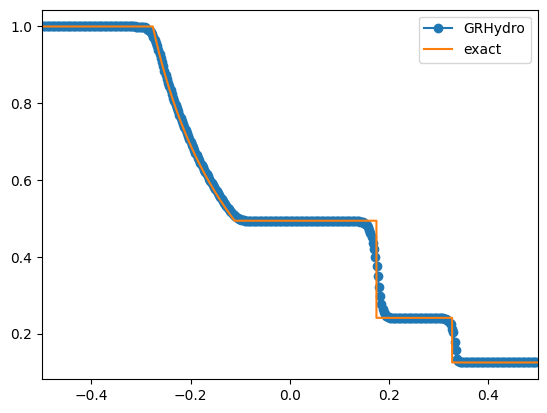

In [31]:
plt.plot(rho[200][0][0].coordinates()[0].data,rho[200][0][0].data, label="GRHydro", marker='o')
plt.plot(x_exact, rho_exact, label="exact")
plt.xlim(-0.5, 0.5)
plt.legend()
plt.show()

In [33]:
1/0.005

200.0

# Change resolution 

dx=0.005 -> N=200

## Read the Numerical Results

In [39]:
gf= SimDir("./Sod_1d_200").gf #simulation directory - so the directory where the results are saved
print(gf) #gridfunction are all the functions available on the grid

#we dont have 2d or 3d output because we selected it in the par file


Available grid data of dimension 1D (x): 
['tau', 'vel[2]', 'vel[0]', 'eps', 'w_lorentz', 'press', 'scon[2]', 'scon[1]', 'rho', 'scon[0]', 'dens', 'vel[1]']


Available grid data of dimension 1D (y): 
['vel[2]', 'w_lorentz', 'scon[2]', 'rho', 'dens', 'scon[1]', 'vel[1]', 'tau', 'eps', 'vel[0]', 'scon[0]', 'press']


Available grid data of dimension 1D (z): 
['vel[0]', 'vel[1]', 'tau', 'vel[2]', 'press', 'rho', 'scon[1]', 'scon[2]', 'scon[0]', 'eps', 'w_lorentz', 'dens']


Available grid data of dimension 2D (xy): 
[]


Available grid data of dimension 2D (xz): 
[]


Available grid data of dimension 2D (yz): 
[]


Available grid data of dimension 3D (xyz): 
[]



In [40]:
vars1d=gf.x #only the ones saved on the x axis
print(vars1d)


Available grid data of dimension 1D (x): 
['tau', 'vel[2]', 'vel[0]', 'eps', 'w_lorentz', 'press', 'scon[2]', 'scon[1]', 'rho', 'scon[0]', 'dens', 'vel[1]']



In [41]:
rho=vars1d.fields.rho

## Kuibit Standard Methods for Plots

We create a uniform grid and plot the data on it. Kuibit indeed assumes that data were produced on a grid with several meshes (AMR). In our case the grid was already uniform, so later we will see an alternative way to plot the data without interpolating them on a new grid.

In [42]:
small_grid = UniformGrid([101], x0=[-0.45], x1=[0.45]) #101 points from -0.45 to 0.45

In [43]:
print(rho.iterations)

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]


In [47]:
rho_final = rho.read_on_grid(100, small_grid)

In [48]:
print(*rho_final.coordinates_meshgrid())

[-4.50000000e-01 -4.41000000e-01 -4.32000000e-01 -4.23000000e-01
 -4.14000000e-01 -4.05000000e-01 -3.96000000e-01 -3.87000000e-01
 -3.78000000e-01 -3.69000000e-01 -3.60000000e-01 -3.51000000e-01
 -3.42000000e-01 -3.33000000e-01 -3.24000000e-01 -3.15000000e-01
 -3.06000000e-01 -2.97000000e-01 -2.88000000e-01 -2.79000000e-01
 -2.70000000e-01 -2.61000000e-01 -2.52000000e-01 -2.43000000e-01
 -2.34000000e-01 -2.25000000e-01 -2.16000000e-01 -2.07000000e-01
 -1.98000000e-01 -1.89000000e-01 -1.80000000e-01 -1.71000000e-01
 -1.62000000e-01 -1.53000000e-01 -1.44000000e-01 -1.35000000e-01
 -1.26000000e-01 -1.17000000e-01 -1.08000000e-01 -9.90000000e-02
 -9.00000000e-02 -8.10000000e-02 -7.20000000e-02 -6.30000000e-02
 -5.40000000e-02 -4.50000000e-02 -3.60000000e-02 -2.70000000e-02
 -1.80000000e-02 -9.00000000e-03  5.55111512e-17  9.00000000e-03
  1.80000000e-02  2.70000000e-02  3.60000000e-02  4.50000000e-02
  5.40000000e-02  6.30000000e-02  7.20000000e-02  8.10000000e-02
  9.00000000e-02  9.90000

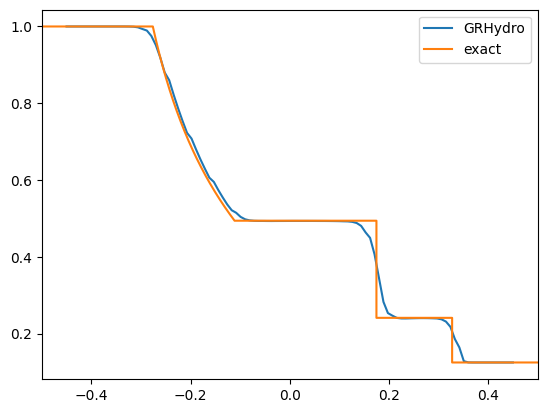

In [49]:
plt.plot(*rho_final.coordinates_meshgrid(), rho_final.data_xyz, label="GRHydro")
plt.plot(x_exact, rho_exact, label="exact")
plt.xlim(-0.5, 0.5)
#plt.ylim(0.1, 0.3)
plt.legend()
plt.show()

## Alternative Method
This method can only be used with simulations that used only one refinement level (i.e., a uniform grid) and using only 1 MPI process. 

this essentially don't do an interpolation

In [50]:
#[iterazione][refinement level][component number] - we change just iteration, now is 0=initial condition
rho[0][0][0].data #raw data with no interpolation 

array([1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125,
       0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125,
       0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125,
       0.125, 0.125,

In [51]:
rho[0][0][0].coordinates()[0].data

array([-0.495, -0.49 , -0.485, -0.48 , -0.475, -0.47 , -0.465, -0.46 ,
       -0.455, -0.45 , -0.445, -0.44 , -0.435, -0.43 , -0.425, -0.42 ,
       -0.415, -0.41 , -0.405, -0.4  , -0.395, -0.39 , -0.385, -0.38 ,
       -0.375, -0.37 , -0.365, -0.36 , -0.355, -0.35 , -0.345, -0.34 ,
       -0.335, -0.33 , -0.325, -0.32 , -0.315, -0.31 , -0.305, -0.3  ,
       -0.295, -0.29 , -0.285, -0.28 , -0.275, -0.27 , -0.265, -0.26 ,
       -0.255, -0.25 , -0.245, -0.24 , -0.235, -0.23 , -0.225, -0.22 ,
       -0.215, -0.21 , -0.205, -0.2  , -0.195, -0.19 , -0.185, -0.18 ,
       -0.175, -0.17 , -0.165, -0.16 , -0.155, -0.15 , -0.145, -0.14 ,
       -0.135, -0.13 , -0.125, -0.12 , -0.115, -0.11 , -0.105, -0.1  ,
       -0.095, -0.09 , -0.085, -0.08 , -0.075, -0.07 , -0.065, -0.06 ,
       -0.055, -0.05 , -0.045, -0.04 , -0.035, -0.03 , -0.025, -0.02 ,
       -0.015, -0.01 , -0.005,  0.   ,  0.005,  0.01 ,  0.015,  0.02 ,
        0.025,  0.03 ,  0.035,  0.04 ,  0.045,  0.05 ,  0.055,  0.06 ,
      

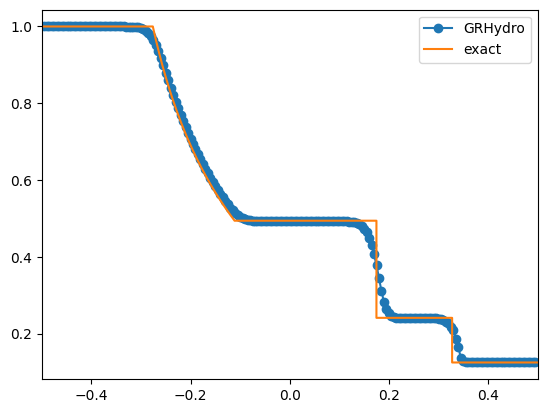

In [54]:
plt.plot(rho[100][0][0].coordinates()[0].data,rho[100][0][0].data, label="GRHydro", marker='o')
plt.plot(x_exact, rho_exact, label="exact")
plt.xlim(-0.5, 0.5)
plt.legend()
plt.show()

# Change resolution 

dx=0.00125 -> N=800

## Read the Numerical Results

In [61]:
gf= SimDir("./Sod_1d_800").gf #simulation directory - so the directory where the results are saved
print(gf) #gridfunction are all the functions available on the grid

#we dont have 2d or 3d output because we selected it in the par file


Available grid data of dimension 1D (x): 
['tau', 'vel[2]', 'vel[0]', 'eps', 'w_lorentz', 'press', 'scon[2]', 'scon[1]', 'rho', 'scon[0]', 'dens', 'vel[1]']


Available grid data of dimension 1D (y): 
['vel[2]', 'w_lorentz', 'scon[2]', 'rho', 'dens', 'scon[1]', 'vel[1]', 'tau', 'eps', 'vel[0]', 'scon[0]', 'press']


Available grid data of dimension 1D (z): 
['vel[0]', 'vel[1]', 'tau', 'vel[2]', 'press', 'rho', 'scon[1]', 'scon[2]', 'scon[0]', 'eps', 'w_lorentz', 'dens']


Available grid data of dimension 2D (xy): 
[]


Available grid data of dimension 2D (xz): 
[]


Available grid data of dimension 2D (yz): 
[]


Available grid data of dimension 3D (xyz): 
[]



In [62]:
vars1d=gf.x #only the ones saved on the x axis
print(vars1d)


Available grid data of dimension 1D (x): 
['tau', 'vel[2]', 'vel[0]', 'eps', 'w_lorentz', 'press', 'scon[2]', 'scon[1]', 'rho', 'scon[0]', 'dens', 'vel[1]']



In [63]:
rho=vars1d.fields.rho

## Kuibit Standard Methods for Plots

We create a uniform grid and plot the data on it. Kuibit indeed assumes that data were produced on a grid with several meshes (AMR). In our case the grid was already uniform, so later we will see an alternative way to plot the data without interpolating them on a new grid.

In [64]:
small_grid = UniformGrid([101], x0=[-0.45], x1=[0.45]) #101 points from -0.45 to 0.45

In [65]:
print(rho.iterations)

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400]


In [66]:
rho_final = rho.read_on_grid(400, small_grid)

In [67]:
print(*rho_final.coordinates_meshgrid())

[-4.50000000e-01 -4.41000000e-01 -4.32000000e-01 -4.23000000e-01
 -4.14000000e-01 -4.05000000e-01 -3.96000000e-01 -3.87000000e-01
 -3.78000000e-01 -3.69000000e-01 -3.60000000e-01 -3.51000000e-01
 -3.42000000e-01 -3.33000000e-01 -3.24000000e-01 -3.15000000e-01
 -3.06000000e-01 -2.97000000e-01 -2.88000000e-01 -2.79000000e-01
 -2.70000000e-01 -2.61000000e-01 -2.52000000e-01 -2.43000000e-01
 -2.34000000e-01 -2.25000000e-01 -2.16000000e-01 -2.07000000e-01
 -1.98000000e-01 -1.89000000e-01 -1.80000000e-01 -1.71000000e-01
 -1.62000000e-01 -1.53000000e-01 -1.44000000e-01 -1.35000000e-01
 -1.26000000e-01 -1.17000000e-01 -1.08000000e-01 -9.90000000e-02
 -9.00000000e-02 -8.10000000e-02 -7.20000000e-02 -6.30000000e-02
 -5.40000000e-02 -4.50000000e-02 -3.60000000e-02 -2.70000000e-02
 -1.80000000e-02 -9.00000000e-03  5.55111512e-17  9.00000000e-03
  1.80000000e-02  2.70000000e-02  3.60000000e-02  4.50000000e-02
  5.40000000e-02  6.30000000e-02  7.20000000e-02  8.10000000e-02
  9.00000000e-02  9.90000

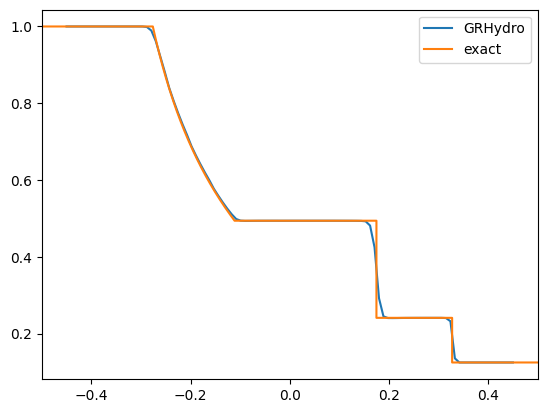

In [68]:
plt.plot(*rho_final.coordinates_meshgrid(), rho_final.data_xyz, label="GRHydro")
plt.plot(x_exact, rho_exact, label="exact")
plt.xlim(-0.5, 0.5)
#plt.ylim(0.1, 0.3)
plt.legend()
plt.show()

## Alternative Method
This method can only be used with simulations that used only one refinement level (i.e., a uniform grid) and using only 1 MPI process. 

this essentially don't do an interpolation

In [83]:
#[iterazione][refinement level][component number] - we change just iteration, now is 0=initial condition
#rho[0][0][0].data #raw data with no interpolation 

In [82]:
#rho[0][0][0].coordinates()[0].data

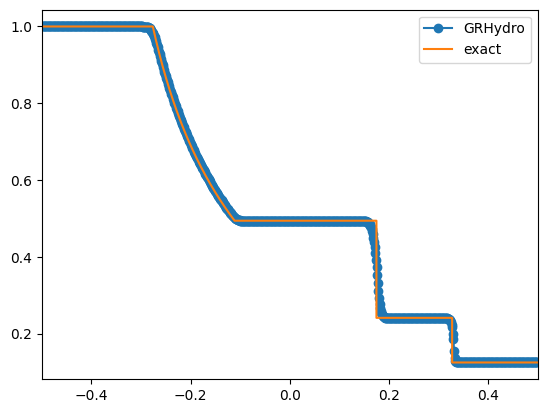

In [71]:
plt.plot(rho[400][0][0].coordinates()[0].data,rho[400][0][0].data, label="GRHydro", marker='o')
plt.plot(x_exact, rho_exact, label="exact")
plt.xlim(-0.5, 0.5)
plt.legend()
plt.show()

# Change resolution 

dx=0.000625 -> N=1600

## Read the Numerical Results

In [84]:
gf= SimDir("./Sod_1d_1600").gf #simulation directory - so the directory where the results are saved
print(gf) #gridfunction are all the functions available on the grid

#we dont have 2d or 3d output because we selected it in the par file


Available grid data of dimension 1D (x): 
['tau', 'vel[2]', 'vel[0]', 'eps', 'w_lorentz', 'press', 'scon[2]', 'scon[1]', 'rho', 'scon[0]', 'dens', 'vel[1]']


Available grid data of dimension 1D (y): 
['vel[2]', 'w_lorentz', 'scon[2]', 'rho', 'dens', 'scon[1]', 'vel[1]', 'tau', 'eps', 'vel[0]', 'scon[0]', 'press']


Available grid data of dimension 1D (z): 
['vel[0]', 'vel[1]', 'tau', 'vel[2]', 'press', 'rho', 'scon[1]', 'scon[2]', 'scon[0]', 'eps', 'w_lorentz', 'dens']


Available grid data of dimension 2D (xy): 
[]


Available grid data of dimension 2D (xz): 
[]


Available grid data of dimension 2D (yz): 
[]


Available grid data of dimension 3D (xyz): 
[]



In [85]:
vars1d=gf.x #only the ones saved on the x axis
print(vars1d)


Available grid data of dimension 1D (x): 
['tau', 'vel[2]', 'vel[0]', 'eps', 'w_lorentz', 'press', 'scon[2]', 'scon[1]', 'rho', 'scon[0]', 'dens', 'vel[1]']



In [86]:
rho=vars1d.fields.rho

## Kuibit Standard Methods for Plots

We create a uniform grid and plot the data on it. Kuibit indeed assumes that data were produced on a grid with several meshes (AMR). In our case the grid was already uniform, so later we will see an alternative way to plot the data without interpolating them on a new grid.

In [87]:
small_grid = UniformGrid([101], x0=[-0.45], x1=[0.45]) #101 points from -0.45 to 0.45

In [88]:
print(rho.iterations)

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520, 530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650, 660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780, 790, 800]


In [89]:
rho_final = rho.read_on_grid(800, small_grid)

In [90]:
print(*rho_final.coordinates_meshgrid())

[-4.50000000e-01 -4.41000000e-01 -4.32000000e-01 -4.23000000e-01
 -4.14000000e-01 -4.05000000e-01 -3.96000000e-01 -3.87000000e-01
 -3.78000000e-01 -3.69000000e-01 -3.60000000e-01 -3.51000000e-01
 -3.42000000e-01 -3.33000000e-01 -3.24000000e-01 -3.15000000e-01
 -3.06000000e-01 -2.97000000e-01 -2.88000000e-01 -2.79000000e-01
 -2.70000000e-01 -2.61000000e-01 -2.52000000e-01 -2.43000000e-01
 -2.34000000e-01 -2.25000000e-01 -2.16000000e-01 -2.07000000e-01
 -1.98000000e-01 -1.89000000e-01 -1.80000000e-01 -1.71000000e-01
 -1.62000000e-01 -1.53000000e-01 -1.44000000e-01 -1.35000000e-01
 -1.26000000e-01 -1.17000000e-01 -1.08000000e-01 -9.90000000e-02
 -9.00000000e-02 -8.10000000e-02 -7.20000000e-02 -6.30000000e-02
 -5.40000000e-02 -4.50000000e-02 -3.60000000e-02 -2.70000000e-02
 -1.80000000e-02 -9.00000000e-03  5.55111512e-17  9.00000000e-03
  1.80000000e-02  2.70000000e-02  3.60000000e-02  4.50000000e-02
  5.40000000e-02  6.30000000e-02  7.20000000e-02  8.10000000e-02
  9.00000000e-02  9.90000

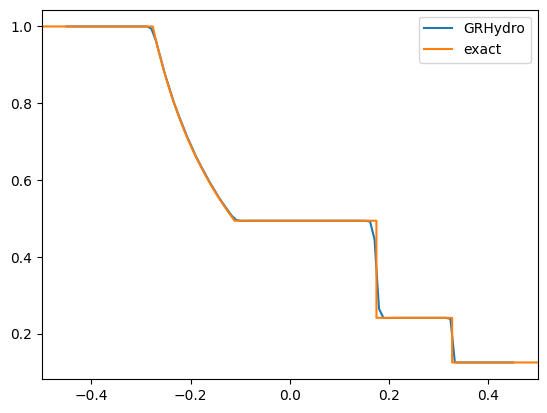

In [91]:
plt.plot(*rho_final.coordinates_meshgrid(), rho_final.data_xyz, label="GRHydro")
plt.plot(x_exact, rho_exact, label="exact")
plt.xlim(-0.5, 0.5)
#plt.ylim(0.1, 0.3)
plt.legend()
plt.show()

## Alternative Method
This method can only be used with simulations that used only one refinement level (i.e., a uniform grid) and using only 1 MPI process. 

this essentially don't do an interpolation

In [83]:
#[iterazione][refinement level][component number] - we change just iteration, now is 0=initial condition
#rho[0][0][0].data #raw data with no interpolation 

In [82]:
#rho[0][0][0].coordinates()[0].data

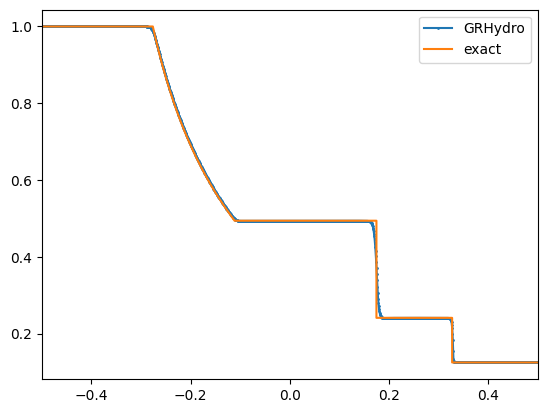

In [93]:
plt.plot(rho[800][0][0].coordinates()[0].data,rho[800][0][0].data, label="GRHydro", marker='o', markersize=1)
plt.plot(x_exact, rho_exact, label="exact")
plt.xlim(-0.5, 0.5)
plt.legend()
plt.show()